## Emphasis:

Probability:

- Conditional Probability 
    - P(A|B) which reads "Probability of A given B has occurred"
- Calculating probability of event, weighted on other events
    - Independent Events
    - Mutually Exclusive Events
- Bayes Theorem
- Likelihood
- Transition Matrix
    - Steady State
    - Transient State
    - Stationary State


Python:
 - Matrix Multiplication
 - Dot multiplication
 - Function Creation
 - Random Int
 - Numpy Linear Algebra
     matrix
     inverse
     matrix multiplication
- Reshape


     

Data Science:

- Specificity
- Sensitivity
    

## Key Terminology

### Bayes Theorem

#### From: 

### P(AB )= P(A|B) * P(B)
### P(AB )= P(B|A) * P(A)


#####Solving using substitution:

### Bayes Theorem: P(A|B )= (P(B|A)  / P(B)) * P(A)

note.......

#### Posterior  = Constant * Prior (knowledge can result in a change in probability)

In [80]:
import pandas as pd
import numpy  as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg

%matplotlib inline

### Conditional Probability (Review)

Conditional Probability measues the probability of an event (Say A) given that another event has occcurred.  It is written as

#### P(A|B) (read "Probability of A given B")

#### Prior Probability  (a priori):  In this context P(A) is sometimes known as the prior probabality (Prior to any additional knowledge)

#### Posteri (a posteriori) P(A|B) "ie given knowledge", to what has as probabability of A  changed

Note that conditional probablity might be larger, the same, or less than the prior
distributions

https://en.wikipedia.org/wiki/Conditional_probability#/media/File:Conditional_probability.svg


### P(A|B) = P(AB) / P(B)

https://en.wikipedia.org/wiki/Conditional_probability#/media/File:Conditional_probability.svg

One way to understand the intuition for this formula is to think of of the relative weights between AB and B.  Now that b occurs the sample space has changed.   A given B will be relative to the new sample space.

https://s3.amazonaws.com/classconnection/156/flashcards/10492156/jpg/conditional_probability-152F061E62D501DF63E.jpg

Another way to build intuition for this formula is to consider P(AB).  To calulate this probability, B must occur and then given B, A must occur.

Thus: 

###  P(A|B)P(B) = P(AB) = P(B|A)P(A)

Note the relationshiop between P(A|B) and P(B|A) known as Bayes Theorem:

### P(A|B) = P(AB)/P(B) = (P(B|A) * P(A)) / P(B)

this is sometimes written as 

### P(A|B) = (P(B|A)/ P(B)) * P(A) 

i.e. Posterior is proportional to Prior 



Intuitive example of conditional probability: Draw a card from a deck of cards.  Determine the prior probabilty that the card is black.   Suppose a second card is exposed from the remaining deck (i.e. without replacing ) and it is red.   What is the posterior (aka conditional) probability that card 1 is black given card 2 is red?

In [40]:
# Let A be a Red card event, B a black card
prior = 26/52.
p_b = 26/52.
p_b_given_a = 26/51.
posterior = (p_b_given_a/p_b)*prior

print "P(Black | Red Card Shown) = P(Red Card Shown | Black) / (P(Red Card Shown)) * P(Black) = ",posterior

print "Posterior / Prior Ratio: ", posterior / prior


P(Black | Red Card Shown) = P(Red Card Shown | Black) / (P(Red Card Shown)) * P(Black) =  0.509803921569
Posterior / Prior Ratio:  1.01960784314


Slight variation : Draw a card from a deck of cards.  Determine the prior probabilty that the card is black.  Show the card to a friend who notes the color and replace the card in the deck .   Reshuffle the deck.  Suppose a second card is exposed from deck  and it is red.   What is the posterior (aka conditional) probability that card 1 was black given card 2 is red?

In [41]:
# Let A be a Red card event, B a black card
prior = 26/52.
p_b = 26/52.
p_b_given_a = 26/52.
posterior = (p_b_given_a/p_b)*prior

print "P(Black | Red Card Shown) = P(Red Card Shown | Black) / (P(Red Card Shown)) * P(Black) = ",posterior

print "Posterior / Prior Ratio: ", posterior / prior


P(Black | Red Card Shown) = P(Red Card Shown | Black) / (P(Red Card Shown)) * P(Black) =  0.5
Posterior / Prior Ratio:  1.0


In the above case the events are independent and the conditioned event provides no additional information.

60 % of a control group (I subgroup) are using medicine A, # 40 percent (II subgroup) do not.   A subject is drawn at random form the control group and a test is performed.  The test is performed detecting the presence of the medicine has a 95% sensitivity rate (True positives) and a 90% specificity rate (True negatives).

What is the probability that the test shows positive?

Note:   This is per se, not a Bayes problem.  It is though, reflective of a conditioned probability technique that is often used to calculate the denominator for bayes theorem.

P(Positive) will need to be conditioned on whether the person is administered the medicine.

P(Positive Test) = P(Positive Test | Group I) * P(I) + P(Positive Test | Group II) * P(II)


In [42]:
group_I = .60
group_II = 1- group_I

sensitivity =  .95 # True postives
specificity  = .90 # True negatives

p_pos = sensitivity * group_I + (1-specificity) * group_II

print "P(Positive Test): ", p_pos

P(Positive Test):  0.61


What is the probability that someone is from subgroup I given that they tested positive?  This is a problem for ...... yes Reverand Thomas Bayes.....
P(I|+) = (P(+|I)/P(+)) * P(I) 


* this is a modified version of a wikipedia prob on conditional probabilty fyi

In [43]:
prior = group_I
p_I_given_positive = sensitivity

# and luckily we have P(+) from above......

print "P(from Group I given a '+' test rsult): ", (p_I_given_positive/p_pos) * prior

P(from Group I given a '+' test rsult):  0.934426229508


## Classic Bayes Theorem Problem:  Monty Hall

Monty Hall Problem:   This is a classic problem that came out of a television game show, which was hosted by you guessed it.  Let's play it.  There are 3 doors, beyond which are hidden two worthless prizes and one mega prize.   You get to choose a door.  Let's say you choose door 1.

Calculate the probability you will win the Mega prize?


In [56]:
doors = 3
priorM = 1./doors
print "The apriori probability (before we have any information) P(Mega) is: ", priorM
print "The ratio of an alternative probabilty to current door probability is:", priorM/priorM

The apriori probability (before we have any information) P(Mega) is:  0.333333333333
The ratio of an alternative probabilty to current door probability is: 1.0


Now here's where it get interesting.  The host knows where the Mega prize is at and walks over to one of the doors that has a worthless prize and opens it up.  He then offers you a choice:  Should you keep your current choice or switch your choice to the other remaining door.   So as an example, you have chosen door 1 and he walks over to door two, opens it up and indicates that it is worthless.  You are then offered the choice to change your choice to door 3 if you like. What should you do?  Should you stay or should you go? 

p.s. if you google search on this topic you will note that this problem is historically very confusing and it baffles some smart folks

We'll calculate the probability using Bayes Theorem.

Let M(1) be the probability that the Mega prize is behind door 1 and let O(k), be the event that the host, Monty hall, opens door k.  Note he is operating only under two rules:  1) he can't open the door with the mega price and 2) he can't show what is behind your door, door 1.


We need to calculate the posterior probability here: P(Mega(1) | O(2)).

Using Bayes theroem this will be (P(O(2) |Mega(1))* P (Mega(1))/P(O(2)

In [48]:
#remembering that if you have the prize behind door one, he has two doors to choose from each of which is equally likely
p_num = (1/2.) * priorM
#now let's calculate the denominator P((0(2)).  This is easiest if we condition on M(k). Note that the
#Monty cannot open up either the door chosen or the door with the prize.  so 

P(O(2)) = P(O(2)|M(1)) * P(M(1)) + P(O(2)|M(2)) * P(M(2)) + P(O(2)|M(3)) * P(M(3))

In [49]:
p_den = (1/2.)*(1/3.) + 0.0 * (1/3.) + 1.0 * (1/3.)
p_mega_post = p_num / p_den

In [50]:
print "The apriori (before we have any information) P(Mega) is: ", P_mega
print "The posterior probability (having some information) P(Mega | Door Open): ",p_mega_post

The apriori (before we have any information) P(Mega) is:  0.333333333333
The posterior probability (having some information) P(Mega | Door Open):  0.333333333333


So the probabality did not change.  So given a choice to switch to the other open box is there a benefit. 


The answer lies in the likelihood....... 

In [58]:
print "The ratio of an alternative probabilty to current door probaility is:", (1-p_mega_post)/p_mega_post

 The ratio of an alternative probabilty to current door probaility is: 2.0


In in doubt on what to do, consult Kevin Spacey.......

https://www.youtube.com/watch?v=Zr_xWfThjJ0

Create a monty_hall function that prints the prior and posterior distribution that is a function of doors

In [59]:
def monty_hall(doors,print_flag):
    prizes = 1.
    open = 1
    prior = prizes/doors 
    open_door_p = 1./(doors-1)
    p_num = open_door_p * prior
    p_den = open_door_p * prior  + 0 * prior + 1 * prior # These are conditioned probabilities
    posterior = p_num/p_den 
    if print_flag == 1:
        print "Apriori Probability:   =", prior   
        print "Posterior Probability: =", posterior
    return

In [60]:
monty_hall(4,1)

Apriori Probability:   = 0.25
Posterior Probability: = 0.25


Create a simulation model to see if it supports a decision to swap.  

Switch win Probability:  0.6605


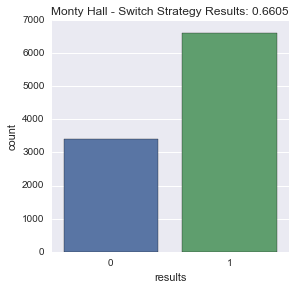

In [78]:
trials = 10000

prize_door = np.random.randint(1,4,size=trials)
switch_wins = []
open_door = 0

for z in range(0,trials):
    prz_door = prize_door[z]
    if prz_door == 1:
        open_door = np.random.randint(2,4)
    else:
        if prz_door == 3:
            open_door = 2
        else:
            open_door = 3
    if open_door == 2:
        hidden_door = 3
    else:
        hidden_door = 2           
    if hidden_door == prz_door:
        switch_wins.append(1)
    else:
        switch_wins.append(0)

print "Switch win Probability: ",np.mean(switch_wins)
        
#put the data in a data frame

sw = pd.DataFrame({'results':switch_wins})
sw['values'] = sw['results']
sw = sw.reset_index()

Title = 'Monty Hall - Switch Strategy Results: ' + str(np.mean(switch_wins))
        
fig = plt.figure(figsize=(9,6))
sns.factorplot(x='results', data=sw, kind='count')
sns.plt.title(Title, fontsize=12)


Generalize the Monty Hall problem to ten doors and graph the likelihood ratios as more doors are opened

In [26]:
doors =10.
Likelihood_Ratios = [(((doors-1)/doors)/(doors-door))/(1./doors) for door in range(1,int(doors))]
Likelihood_Ratios

[1.0,
 1.125,
 1.2857142857142858,
 1.4999999999999998,
 1.7999999999999998,
 2.25,
 2.9999999999999996,
 4.5,
 9.0]

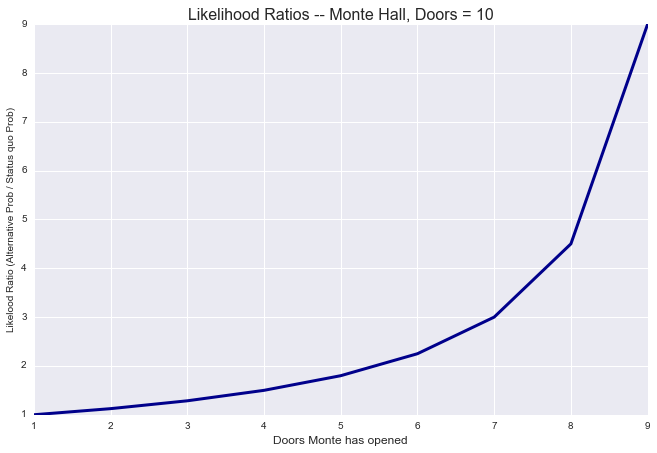

In [27]:
last_door = int(doors)
xpoints = range(1,last_door)
ypoints = Likelihood_Ratios
fig = plt.figure(figsize=(11,7))
  
ax = fig.gca()
ax.plot(xpoints, ypoints, linewidth=3, color='darkblue')
ax.set_ylabel('Likelood Ratio (Alternative Prob / Status quo Prob)', fontsize=10)
ax.set_xlabel('Doors Monte has opened', fontsize=12)
ax.set_title("Likelihood Ratios -- Monte Hall, Doors = " + str(last_door), fontsize=16)

plt.show()

Bonus Materials:  Transition Matrices / Markov Chains  First some set up.  Read a vector of probabilities and convert it to a transition matrix.  Each element of the array a(i,j) represents the probability at a given iteration to move from i to j

In [89]:
z = np.matrix([[1, 2], [3, 4]]) #only here to illustrate a  matrix creation option

In [135]:
prob_vector = [.70,.20,.0,.10,0.0,1.,0.0,0.0,0.0,0.0,.42,0.0,.41,.17,0.0,.0,.62,.25,.13,0.0,.25,.25,.25,.25,0.0]
sum(prob_vector)

5.0

In [136]:
transition = np.reshape(prob_vector,(5,5))
transition

array([[ 0.7 ,  0.2 ,  0.  ,  0.1 ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.42,  0.  ,  0.41,  0.17,  0.  ],
       [ 0.  ,  0.62,  0.25,  0.13,  0.  ],
       [ 0.25,  0.25,  0.25,  0.25,  0.  ]])

create a function that multiplies a matrix to a power

In [137]:
def matrix_mult(x,power):
    z = x.copy()
    for k in range(1,power):
        z = np.matmul(x,z)
    return z
        

In [139]:
x_5 = matrix_mult(transition,5)
x_5

array([[ 0.6878982 ,  0.19102802,  0.0352615 ,  0.08581228,  0.        ],
       [ 0.68933   ,  0.1912048 ,  0.03372   ,  0.0857452 ,  0.        ],
       [ 0.66844518,  0.18802052,  0.053809  ,  0.08972531,  0.        ],
       [ 0.67971854,  0.18822674,  0.04483234,  0.08722238,  0.        ],
       [ 0.67423668,  0.18907894,  0.04834134,  0.08834304,  0.        ]])

In [140]:
x_50 = matrix_mult(transition,50)
x_50

array([[ 0.68675788,  0.19071097,  0.0364676 ,  0.08606354,  0.        ],
       [ 0.68675788,  0.19071097,  0.0364676 ,  0.08606354,  0.        ],
       [ 0.68675788,  0.19071097,  0.0364676 ,  0.08606354,  0.        ],
       [ 0.68675788,  0.19071097,  0.0364676 ,  0.08606354,  0.        ],
       [ 0.68675788,  0.19071097,  0.0364676 ,  0.08606354,  0.        ]])

1) you can see after 5 iterations the model converging to steady state
2) 5 is considered a transient class (col 5 = 0's).  anything leaving the state doesn not return
3) The opposite fo a transient class is a recurrent class.  1-4 make up a recurring class
